# Задача проекта 

Гланая цель проекта определить самый выгодный для компании тарифный план. 

План работы над проектом.

1. <a href='#анализ'> Общая информация.</a>

    <a href='#analysis_output'> Вывод </a>

2. <a href ='#предобработка'>Предобработка данных. Замена пропусков, типов данных, поиск дубликатов. </a>
    
    2.1 <a href ='#change_data'> Проверка типа данных </a>
    
    2.2 <a href ='#NaN_zero'> Обработка пустых и нулевых значений </a>
    
    2.3 <a href ='#duble'> Поиск дубликатов </a>
  
  <a href ='#output_preparation'> Вывод </a>
  

3. <a href ='#Подсчет'> Подсчет данных </a>

    3.1 <a href='#звонки'>Количество сделанных звонков и израсходованных минут разговора по месяцам</a> 
    
    3.2 <a href="#message">Количество отправленных сообщений по месяцам</a>
    
    3.3 <a href="##internet"> Объем израсходованного интернет-трафика по месяцам </a>
    
    3.4 <a href="#peer_month_proceed"> Помесячную выручку с каждого пользователя</a>

  
  
4. <a href="##description">Описание поведения клиентов оператора</a>

    4.1 <a href='#volume'>Обьем минут разговора, интернет-трафика и сообщений </a>
    
    4.2 <a href='#mean'> Среднее, дисперсия и стандартное отклонение. </a>
    
 
5. <a href="##hypothesis"> Проверка гипотез </a>
    
    5.1 <a href="##mean proceeds"> средняя выручка пользователей тарифов «Ультра» и «Смарт» различается </a>
    
    5.2 <a href="##mean proceeds_city"> средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов </a>


6. <a href='##output'>Вывод </a>

<a id='анализ'></a>

# 1. Общий анализ данных.

Открыть файлы с данными, проверить наличие пустых значений, проверить соответсвие типов данных.



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np
from scipy import stats as st
import seaborn as sns


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# calls 
calls = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Shad/04_EDA_mobile/calls.csv')

calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [4]:
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [5]:
calls.duration.describe()

count    202607.000000
mean          6.755887
std           5.843365
min           0.000000
25%           1.300000
50%           6.000000
75%          10.700000
max          38.000000
Name: duration, dtype: float64

In [6]:
#internet
internet = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Shad/04_EDA_mobile/internet.csv')
internet.info()
internet.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [7]:
internet.mb_used.describe()

count    149396.000000
mean        370.192426
std         278.300951
min           0.000000
25%         138.187500
50%         348.015000
75%         559.552500
max        1724.830000
Name: mb_used, dtype: float64

In [8]:
#messages
messages = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Shad/04_EDA_mobile/messages.csv')
messages.info()
messages.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


In [9]:
#tariffs
tariffs = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Shad/04_EDA_mobile/tariffs.csv')
tariffs.info()
tariffs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [10]:
#users
users = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Shad/04_EDA_mobile/users.csv')
users.info()
users.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


<a id='analysis_output'></a>
## Вывод


    
1. Таблица calls - Пропусков нет, но есть нудлевые значения в стлбце duration.

    * call_date - првести в типу время
 
    * duration - округлить в большую сторону


2. internet - пустых значений нет, есть столбец Unnamed: 0 в описании к проекту его нет.
 
    * session_date - привести к типу дата.

    * mb_used - округлить в большую сторону. проверить нулевые значения.  


3. messages - пропусков нет.

    * message_date - привести к типу дата.
    

4. tariffs - пропусков нет, нулевых значений нет.


5. users - пропусков нет. есть значения NaN

    * проверить поле churn_date. 
 
    * reg_date - привести к типу дата
 


<a id='предобработка'></a>

# 2. Предобработка.

<a id='change_data'></a>
### Проверка типов данных

In [11]:
calls.call_date = pd.to_datetime(calls.call_date,format='%Y-%m-%d')

internet.session_date = pd.to_datetime(internet.session_date,format='%Y-%m-%d')

users.reg_date = pd.to_datetime(users.reg_date,format='%Y-%m-%d')

messages.message_date = pd.to_datetime(messages.message_date,format='%Y-%m-%d') 

<a id='NaN_zero'></a>
### Работа с пропусками


<a id='calls'></a>


Text(0.5, 1.0, 'продолжительность звонков')

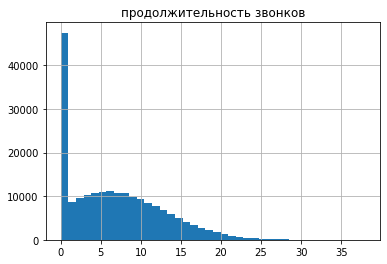

In [12]:
# Посмотрим на гистограмму по звонкам.
calls.duration.hist(bins=40)

# Большой пик на нуле, посмотрим сколько таких строк
plt.title('продолжительность звонков')



In [13]:
#Округлим до целого в большую сторону, согласно условиям тарификации.
calls.duration = calls.duration.apply(math.ceil)

In [14]:
calls

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0,1000
1,1000_1,2018-08-17,0,1000
2,1000_2,2018-06-11,3,1000
3,1000_3,2018-09-21,14,1000
4,1000_4,2018-12-15,6,1000
...,...,...,...,...
202602,1499_215,2018-12-26,1,1499
202603,1499_216,2018-10-18,19,1499
202604,1499_217,2018-11-10,11,1499
202605,1499_218,2018-10-06,5,1499


<a id='internet_df'></a>


In [15]:

#избавимся от ненужного столбца и округлим значения в большую сторону
internet = internet.loc[:,['id','mb_used','session_date','user_id']] 
internet.mb_used = internet.mb_used.apply(math.ceil)

#посчитаем кол-во нулевых значений.
print('количество нулевых значений',len(internet.loc[internet.mb_used == 0]))
#Удалим нулевые ссесси
internet=internet.query('mb_used!=0')
print('количество нулевых значений',len(internet.loc[internet.mb_used == 0]))

количество нулевых значений 19598
количество нулевых значений 0


In [16]:
users.info()
users.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   age         500 non-null    int64         
 2   churn_date  38 non-null     object        
 3   city        500 non-null    object        
 4   first_name  500 non-null    object        
 5   last_name   500 non-null    object        
 6   reg_date    500 non-null    datetime64[ns]
 7   tariff      500 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


<a id = 'duble'></a>
### Поиск дубликатов


In [17]:
internet.duplicated().sum()
calls.duplicated().sum()
users.duplicated().sum()

0

<a id='output_preparation'></a>
## Вывод

1. Звонки и интернет

В таблице есть нулевые значения и их достаточно много. Удалять или заменять их не стоит, они нужны. Звонок с нулевой продолжительностью тоже звнок, он влияет на понимание общего количества совершеных звонков, но не влияет на общую продолжительность.


2. Интернет

В таблице есть нулевые значения и их достаточно много. Удалять нет смысла, на объем трафика они не влияют. В отличие от звонков, нулевая интернет сессия может указывать на проблемы с прохождением трафика, эту информацию нужно отдельно изучать. В рамках текущих вопросов эти данные не искажают представление о среднем пользовательском трафике 

3. Users, tariffs, messages. Артефактов не замечено. Из всех таблиц только в users столбец churn_date был с NaN, но он  не несет никакой ценности для нас, поэтому значения NaN остались в таблице. 



Были приведены к типу дата.

calls.call_date internet.session_date users.reg_date messages.message_date - 

Дубликатов не обнаружено.




<a id="Подсчет"></a>


# 3. Подсчет-данных.

<a id='звонки'> </a>
### 3.1 количество сделанных звонков и израсходованных минут разговора по месяцам

    

In [18]:
# Для подсчета возьмем датафрейм calls и добавим столбец с месяцем.
calls['month'] = calls.call_date.dt.month
# сгруппируем по пользователям, месяцам и посчитаем общую продолжительность звонков
# и их количество

calls.groupby(['user_id','month'])['duration','id'].agg({'id':'count','duration':'sum'})


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


id  duration
user_id month              
1000    5      22       159
        6      43       172
        7      47       340
        8      52       408
        9      58       466
...            ..       ...
1498    10     41       247
1499    9       9        70
        10     68       449
        11     74       612
        12     69       492

[3174 rows x 2 columns]

In [19]:
#Теперь удалим нулевые звонки, дальше они нам не нужны
calls = calls.query('duration!=0')


<a id='message'> </a>
### 3.2 количество отправленных сообщений по месяцам для каждого пользователя

In [20]:
#Добавим столбец с месяцем отправки сообщшения
messages['month'] = messages.message_date.dt.month
messages.pivot_table(index='user_id',columns='month',aggfunc='count',values='id').fillna(0)


month,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,0.0,0.0,0.0,0.0,22.0,60.0,75.0,81.0,57.0,73.0,58.0,70.0
1002,0.0,0.0,0.0,0.0,0.0,4.0,11.0,13.0,4.0,10.0,16.0,12.0
1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37.0,91.0,83.0,94.0,75.0
1004,0.0,0.0,0.0,0.0,95.0,134.0,181.0,151.0,146.0,165.0,158.0,162.0
1005,7.0,38.0,56.0,41.0,42.0,47.0,56.0,64.0,52.0,44.0,51.0,54.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,82.0,82.0,79.0,84.0
1496,9.0,45.0,46.0,49.0,40.0,35.0,42.0,41.0,29.0,35.0,46.0,51.0
1497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,14.0,17.0


<a id='#internet'> </a>
### 3.3 Объем израсходованного интернет-трафика по месяцам

In [21]:
internet['month'] = internet.session_date.dt.month
internet.pivot_table(index='user_id',columns='month',aggfunc='sum',values='mb_used').fillna(0)


month,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,0.0,0.0,0.0,0.0,2256.0,23257.0,14016.0,14070.0,14581.0,14717.0,14768.0,9827.0
1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18452.0,14053.0
1002,0.0,0.0,0.0,0.0,0.0,10871.0,17601.0,20347.0,16712.0,13905.0,18610.0,18137.0
1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8571.0,12479.0,14779.0,11368.0,10132.0
1004,0.0,0.0,0.0,0.0,13415.0,17619.0,22243.0,28607.0,15125.0,18494.0,15631.0,18038.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2616.0,33105.0,29393.0,38972.0,23450.0
1496,3766.0,28523.0,24990.0,21098.0,23740.0,20163.0,24395.0,23560.0,26970.0,28215.0,25092.0,20757.0
1497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11512.0,14174.0,19940.0


In [22]:
# сводная таблица по звонкам
user_month_calls = calls.groupby(['user_id','month']).agg({'id':'count','duration':'sum'})
user_month_calls.columns=['count_calls','duration_calls']

#Сводная таблица по сообщениям
user_month_messages = messages.groupby(['user_id','month']).agg({'id':'count'})
user_month_messages.columns=['count_messages'] 

#сводная таблица по трафику
user_month_internet = internet.groupby(['user_id','month']).agg('sum')
user_month_internet.columns=['mb_used']

#Сведем все в одну таблицу

calc_table = pd.merge(user_month_calls.reset_index(),user_month_messages.reset_index(),how='outer',on=['user_id','month'])

calc_table=calc_table.merge(user_month_internet.reset_index(), how='outer',on=['user_id','month'])
calc_table = pd.merge(calc_table, users[['user_id','tariff','city']],on='user_id',how='left')
#заменим NaN нулями для удобсва в дальнейших расчетах.
   
calc_table = calc_table.merge(tariffs,left_on='tariff',right_on='tariff_name').fillna(0)
calc_table
#Получилас довольно большая таблица, но со всеми  данными.

,user_id,month,count_calls,duration_calls,count_messages,mb_used,tariff,city,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,1000,5,17.0,159.0,22.0,2256.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1,ultra
1,1000,6,28.0,172.0,60.0,23257.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1,ultra
2,1000,7,41.0,340.0,75.0,14016.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1,ultra
3,1000,8,42.0,408.0,81.0,14070.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1,ultra
4,1000,9,46.0,466.0,57.0,14581.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1,ultra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,8,0.0,0.0,17.0,11066.0,smart,Санкт-Петербург,50,15360,500,550,200,3,3,smart
3210,1489,9,0.0,0.0,32.0,17232.0,smart,Санкт-Петербург,50,15360,500,550,200,3,3,smart
3211,1489,10,0.0,0.0,21.0,19588.0,smart,Санкт-Петербург,50,15360,500,550,200,3,3,smart
3212,1489,11,0.0,0.0,20.0,17516.0,smart,Санкт-Петербург,50,15360,500,550,200,3,3,smart


In [23]:
f'Количество пользователей: {calc_table.user_id.nunique()}'

'Количество пользователей: 498'

In [24]:
#расчет по звонкам.
def over_price_call(row):
    if row['duration_calls'] > row['minutes_included']:
        over_price_call = (row['duration_calls']-row['minutes_included'])*row['rub_per_minute']
    else: over_price_call = 0
        
    return over_price_call

In [25]:
#расчет по интернет трафику.
def over_price_internet(row):
    if row['mb_used'] > row['mb_per_month_included']:
        over_price_internet = ((row['mb_used']-row['mb_per_month_included'])/1000)*row['rub_per_gb']
    else: over_price_internet = 0
    return over_price_internet

In [26]:
#расчет по сообщениям.
def over_price_message(row):
    if row['count_messages'] > row['messages_included']:
        over_price_message = (row['count_messages']-row['messages_included'])*row['rub_per_message']
    else: over_price_message = 0
    return over_price_message    

In [27]:
#общая выручка
def total_sum(row):
    total_over_price = row['over_price_call']+row['over_price_internet']+row['over_price_message']
    return total_over_price

In [28]:
calc_table['over_price_call'] = calc_table.apply(over_price_call,axis=1)
calc_table['over_price_internet'] =  calc_table.apply(over_price_internet,axis=1)
calc_table['over_price_message'] = calc_table.apply(over_price_message,axis=1)
calc_table['over_price_total'] = calc_table.apply(total_sum,axis=1)
calc_table['total_proceeds'] = calc_table['over_price_total']+calc_table['rub_monthly_fee']

<a id='peer_month_proceed'></a>
### 3.4 Помесячная выручка по каждому пользователю

In [29]:
calc_table.pivot_table(index='user_id',columns='month',values='total_proceeds',aggfunc='sum').fillna(0)

month,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,0.0,0.0,0.0,0.0,1950.0,1950.0,1950.0,1950.0,1950.00,1950.0,1950.0,1950.0
1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,1168.4,550.0
1002,0.0,0.0,0.0,0.0,0.0,550.0,998.2,1547.4,820.40,550.0,1200.0,1105.4
1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1950.0,1950.00,1950.0,1950.0,1950.0
1004,0.0,0.0,0.0,0.0,1950.0,1950.0,1950.0,1950.0,1950.00,1950.0,1950.0,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1950.0,2307.75,1950.0,3187.8,1950.0
1496,550.0,3464.6,2647.0,1760.6,2226.0,1675.6,2603.0,2271.0,2872.00,3121.0,2982.4,1686.4
1497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,550.0,550.0,1601.0


## Вывод
Сформирована итоговая таблица.
Судя по предстваленным данным, есть ощутимый прирост пользователей в течении года. 

<a id='#description'> </a>
# Описание поведения клиентов оператора

<a id='volume'></a>
### 4.1 Обьем минут разговора, интернет-трафика и сообщений

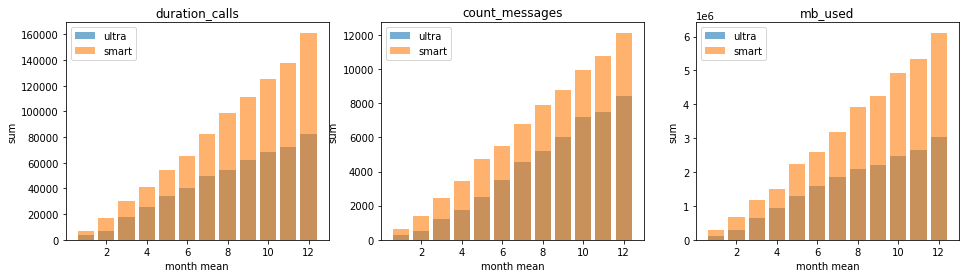

In [30]:
# список с параметрами для отрисовки
tariff_list = calc_table['tariff'].unique().tolist()
graph_list = ['duration_calls','count_messages','mb_used']

# панель графиков
f, axis = plt.subplots(1,len(graph_list),figsize=(16,4))

for i in tariff_list:
   
    for  g in graph_list:
        bar_table = calc_table.query('tariff==@i').pivot_table(index='month',values=g,aggfunc='sum').reset_index()
        # потребление по месяцам 
        axis[graph_list.index(g)].bar(bar_table['month'],bar_table[g],label=i,alpha=0.6)
        
        axis[graph_list.index(g)].set_title(g)
        axis[graph_list.index(g)].set_xlabel('month mean')
        axis[graph_list.index(g)].set_ylabel('sum')
        axis[graph_list.index(g)].legend()
        
        
  

In [31]:
#Прирост пользователей.
count_user_peer_month=calc_table.pivot_table(index='tariff',columns='month',values='user_id',aggfunc='count').reset_index()
count_user_peer_month

month,tariff,1,2,3,4,5,6,7,8,9,10,11,12
0,smart,34,58,77,112,141,164,201,235,260,294,316,337
1,ultra,9,24,37,55,67,84,91,107,115,123,134,139


In [32]:
#посмотрим по общему обьему и в процентном соотношении
sum_table=(
    calc_table
    .pivot_table(index='tariff'
                 ,values=['duration_calls','count_messages','mb_used','total_proceeds']
                 ,aggfunc='sum')
    .reset_index()
)
sum_table['percent_count_messages'] = sum_table.count_messages / sum_table.count_messages.sum() 
sum_table['percent_duration_calls']=sum_table.duration_calls / sum_table.duration_calls.sum() 
sum_table['percent_mb_used']=sum_table.mb_used / sum_table.mb_used.sum() 
sum_table['percent_proceeds']=sum_table.total_proceeds / sum_table.total_proceeds.sum()
sum_table

,tariff,count_messages,duration_calls,mb_used,total_proceeds,percent_count_messages,percent_duration_calls,percent_mb_used,percent_proceeds
0,smart,74413.0,931577.0,36174861.0,2778084.40,0.604807,0.642334,0.653336,0.577526
1,ultra,48623.0,518724.0,19194598.0,2032234.95,0.395193,0.357666,0.346664,0.422474


In [33]:
# переплаты по пользователм 
over_price_table = (
calc_table
    .groupby(['user_id','tariff'])
            ['over_price_call','over_price_internet','over_price_message','over_price_total','tariff','duration_calls']
    .agg('sum')
    .reset_index()
)
#Отметим пользователей с переплатой
over_price_table['over_fact'] = over_price_table.over_price_total > 0

#снова сгруппируем и посчитаем общую переплату по тарифам и  количество пользователей
over_by_user = (
    over_price_table.groupby('tariff')
    .agg({'user_id':'count','over_price_total':'sum','over_fact':'sum'})
    .reset_index()
)

over_by_user['persent_user_with_over'] = over_by_user['over_fact'] /over_by_user['user_id']
over_by_user['ovver_sum_by_user'] = over_by_user['over_price_total'] / over_by_user['over_fact']
over_by_user

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


,tariff,user_id,over_price_total,over_fact,persent_user_with_over,ovver_sum_by_user
0,smart,350,1552134.40,333,0.951429,4661.064264
1,ultra,148,111484.95,43,0.290541,2592.673256


### Вывод
Обьем по всем тарификационным еденицам увеличивается с каждым месяцем, это связанно с приходом новых пользователей.
На месячном распределении это отчетливо видно.
Например пользователям тарифа ultra на 9 пользователей было достаточно всего  окло 3000 минут, а вконце года для 148 пользователй уже более 80 000

Стоит отметить, что при том что пользователей с тарифом ultra меньше более чем в 2 раза, они генерируют более трети трафика по всем параметрам и их доля в общей выручке составляет 42%.

Так же на протяжении всего года был активный прирост клиентов. 
в конце года отношение пользоватлей с тарифом smart и ultra осталось практически без изменений по сравнению на началом года.Прирост пользователей идет поропорционально.

 

<a id='mean'> </a>
### 4.2 Среднее, дисперсия и стандартное отклонение 

In [34]:
# smart
(calc_table
 .query('tariff=="smart"')
 .groupby('month')['duration_calls','count_messages','mb_used']
 .agg(['mean',np.median])
 .round(0)
) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


duration_calls        count_messages         mb_used         
                mean median           mean median     mean   median
month                                                              
1              204.0  162.0           18.0   15.0   8524.0   7107.0
2              299.0  258.0           24.0   20.0  11611.0  12572.0
3              390.0  409.0           32.0   23.0  15124.0  15690.0
4              367.0  368.0           31.0   28.0  13479.0  14104.0
5              387.0  433.0           34.0   30.0  15825.0  16343.0
6              396.0  400.0           33.0   28.0  15815.0  16096.0
7              408.0  414.0           34.0   29.0  15764.0  15948.0
8              421.0  432.0           34.0   27.0  16632.0  16855.0
9              429.0  435.0           34.0   30.0  16325.0  16050.0
10             426.0  428.0           34.0   30.0  16779.0  17248.0
11             435.0  428.0           34.0   28.0  16918.0  17036.0
12             479.0  471.0           36.0   29.0  18137.0  17741.0

In [35]:
#Ulta
(calc_table
 .query('(tariff=="ultra")')
 .groupby('month')['duration_calls','count_messages','mb_used']
 .agg(['mean',np.median])
 .round(0)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


duration_calls        count_messages         mb_used         
                mean median           mean median     mean   median
month                                                              
1              428.0  382.0           34.0   32.0  13154.0  14808.0
2              297.0  168.0           22.0    6.0  11787.0   7336.0
3              490.0  403.0           32.0   20.0  17552.0  17513.0
4              458.0  453.0           32.0   17.0  16844.0  16662.0
5              510.0  519.0           38.0   25.0  19381.0  18717.0
6              480.0  479.0           42.0   28.0  18942.0  19496.0
7              546.0  542.0           50.0   38.0  20515.0  20034.0
8              511.0  500.0           48.0   40.0  19594.0  18945.0
9              539.0  520.0           52.0   43.0  19222.0  19675.0
10             558.0  533.0           58.0   49.0  20064.0  20359.0
11             541.0  546.0           56.0   43.0  19805.0  18398.0
12             593.0  584.0           61.0   51.0  21814.0  21994.0

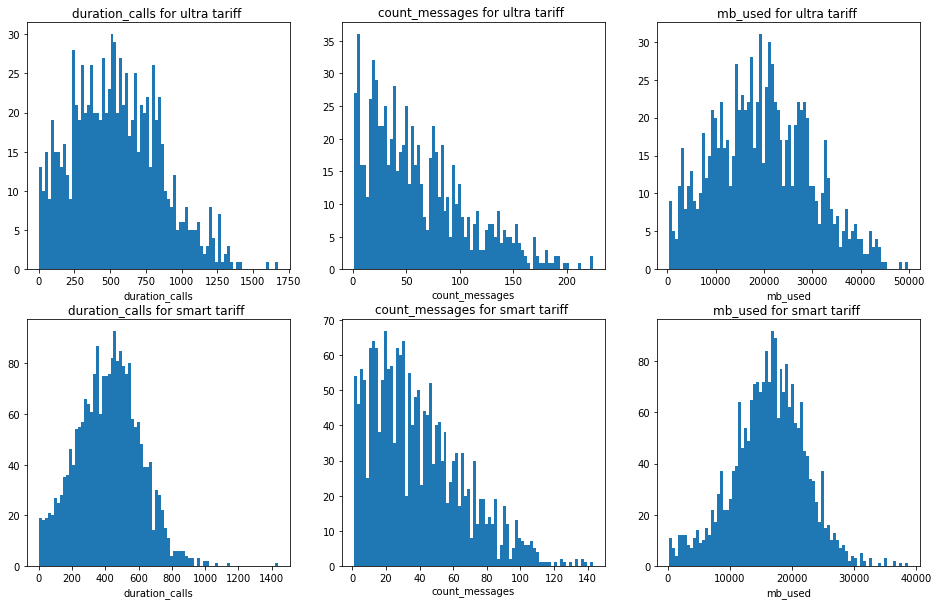

In [36]:

fig, ax = plt.subplots(len(tariff_list),len(graph_list),figsize=(16,10))

for i in tariff_list:
    calc_tariff_hist = calc_table.query('tariff==@i').fillna(0)
    for j in graph_list:
        #гистограмы по интересующим столбцам, без нуевых значений
        ax[tariff_list.index(i),graph_list.index(j)].hist(calc_tariff_hist.loc[calc_tariff_hist[j]!=0, j],bins=80)
        ax[tariff_list.index(i),graph_list.index(j)].set_title('ddd')
        ax[tariff_list.index(i),graph_list.index(j)].set_title(j+" for "+i+" tariff ")
        ax[tariff_list.index(i),graph_list.index(j)].set_xlabel(j)



In [37]:
(calc_table
 .groupby('tariff')['duration_calls','count_messages','mb_used']
 .agg(['mean',np.median, np.var,np.std,np.min,np.max])
 .round(0)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


duration_calls                   ...  mb_used              
                 mean median       var  ...      std amin     amax
tariff                                  ...                       
smart           418.0  422.0   36219.0  ...   5878.0  0.0  38610.0
ultra           527.0  518.0  100874.0  ...  10096.0  0.0  49789.0

[2 rows x 18 columns]

In [38]:
np.var(calc_table.loc[calc_table.tariff=="smart",'duration_calls'],ddof=1)



36219.31578434424

In [39]:
np.var(calc_table.loc[calc_table.tariff=="smart",'count_messages'],ddof=1)

796.8129584480083

## Вывод

Графики
1. начнем со звонков.
 * Распределение нормальное в  обоих вариантах тарифов. Но есть сильные скачки значений. 
 * продолжительность разгоров у клиентов с тарифов smart имеет больший разлет по оси х,в  сравнении с клиентами  тарифа ultra, наверное из-за разности количества клиентов или из-за особенностей пользователей подключающизся к тарифам в течнии года. 
 * Количество пользозвателей, которые имеют большую продолжительность разговоров, больше с тарифрм ultra чем smart

2. сообщения 
 * Распределение похоже на скошенное вправо. Много пиковых значений.Вероятно есть пользователи, которые очень активно рассылают много сообшений.
 
3. трафик.
 * распределение потребления трафика очень похоже на распределение звонков в соответсвии с тарифом.
 
Дисперсия и отклонение.

Цифры говорят о большом разброс в данных(те самые скачки на графиках). Даже с учетом разделения по тарифам. 
Меньше отклонение у пользователей тарифа smart.
Такой разброс может быть связан с моментом подключением новых пользователей. Новый пользователь может подключиться в конце месяца и не успеть обеспечить близкое к среднему значению количество минут, интернет трафика или сообщений.
на графиках видно большой пик возле нулевых значений.
Или же это следствие кол-ва пользователей, которых мало, но при этом генерация трафика достаточно большая.


<a id='#hypothesis'> </a>
# 5. Проверка гипотез

<a id='#mean proceeds'></a>
### 5.1 Cредняя выручка пользователей тарифов «Ультра» и «Смарт» различается

Сформулируем нулевую гипотезу. "Средняя выручка от тарифа smart и ultra равны" 

Сформулируем альтернативную гипотезу. "Средняя выручка от тарифа smart и ultra не равны"


In [40]:
# 
# Сформируем две выборки для проверки гипотезы.

smart_proceed_mean=(
    calc_table.loc[calc_table.tariff=="smart",'total_proceeds']
)

ultra_proceed_mean=(
    calc_table.loc[calc_table.tariff=="ultra",'total_proceeds']
)

Проверим дисперсию и среднее

In [41]:
smart_proceed_mean.describe()

count    2229.000000
mean     1246.336653
std       803.671482
min       550.000000
25%       550.000000
50%       967.200000
75%      1686.400000
max      6820.000000
Name: total_proceeds, dtype: float64

In [42]:
ultra_proceed_mean.describe()

count     985.000000
mean     2063.182690
std       364.856367
min      1950.000000
25%      1950.000000
50%      1950.000000
75%      1950.000000
max      4810.350000
Name: total_proceeds, dtype: float64

In [43]:

alpha = .05
results = st.ttest_ind(
    smart_proceed_mean, 
    ultra_proceed_mean,equal_var=False)


print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 



p-значение: 6.419305524049987e-280
Отвергаем нулевую гипотезу


<a href='#mean proceeds_city'> </a>
### 5.1 Cредняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

Сформулируем нулевую гипотезу. "Средняя выручка абонентов Москвы и других городов равны"

Сформулируем альтернативную гипотезу. "Средняя выручка абонентов Москвы и других городов не равны"

In [44]:
# Сформируем две выборки для проверки гипотезы.

moscow_proceed_mean=(
    calc_table.loc[calc_table.city=="Москва",'total_proceeds']
)

another_proceed_mean=(
    calc_table.loc[calc_table.city!="Москва",'total_proceeds']
)


In [45]:
moscow_proceed_mean.describe()

count     611.000000
mean     1515.902782
std       747.676494
min       550.000000
25%       734.500000
50%      1721.400000
75%      1950.000000
max      5279.200000
Name: total_proceeds, dtype: float64

In [46]:
another_proceed_mean.describe()

count    2603.000000
mean     1492.163945
std       804.616310
min       550.000000
25%       691.000000
50%      1533.400000
75%      1950.000000
max      6820.000000
Name: total_proceeds, dtype: float64

In [48]:
alpha = .05


results = st.ttest_ind(
    moscow_proceed_mean, 
    another_proceed_mean)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
  
    print("Не получилось отвергнуть нулевую гипотезу") 
results = st.ttest_ind(
    moscow_proceed_mean, 
    another_proceed_mean,equal_var=False)

p-значение: 0.5061098431334738
Не получилось отвергнуть нулевую гипотезу


## Вывод
Мы имеем дело с двухсторонними гипотизами в обоих случаях.
Согласно нулевой гипотизе разница между средними двух случайных выборок равна 0, значит альтернативная гипотеза берет на себя опровергающи области слева <0 и справа >0  исходя из этого пороговое значение выбрано 5.


<a id='#output'></a>
# 6.Общий вывод

Общее количество пользователей в воборке 498.
Пользователей с тарифом smart 350
Пользователей с тарифом ultra 148

Отвечая на главный вопрос, какой тариф для компании более выгодный, я скажу что это тариф ultra.
* по соотношению кол-ва пользователей и получаемоф выручки, пользователи с тарифом ultra при том что их меньше больше чем в 2 раза приносят компании 42% выручки.

Но тариф smart это очень удобны тариф для подключения новых пользователей. Этот тариф имеет очень низкий входной порог для пользователя. К тому же переплаты по тарифам встречаются в 95% именно у пользователей этого тарифа

Если цель стоит привлеч больше клиентов, я бы рекомендовал обратить внимание на тариф smart. 
Далее, проанализировать и части клиентов предложить перейти на тариф ultra.



